# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:27<00:00, 2.15KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

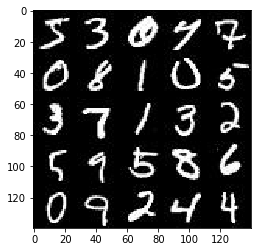

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

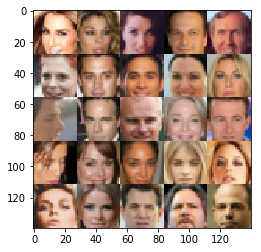

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/kalyankatika/anaconda/envs/dlnd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # Implemented Function
    
    input_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height,  image_channels), name="input_real")   
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name="input_z")   
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
   
    return input_real, input_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # Implemented Function

    alpha = 0.2

    with tf.variable_scope('discriminator', reuse=reuse):
        # Inpu:28x28x3
        x = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x = tf.maximum(x*alpha, x)
        #14x14x64

        x = tf.layers.conv2d(x, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x*alpha, x)
        #7x7x128

        x = tf.layers.conv2d(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x*alpha, x)
        #4x4x256

        x = tf.layers.conv2d(x, 512, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x*alpha, x)
        #2x2x512

        x = tf.reshape(x, [-1, 2*2*512])
        logits = tf.layers.dense(x, 1)
        output = tf.sigmoid(logits)

    return output, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # Implemented Function
    
    alpha = 0.2
    
    with tf.variable_scope("generator", reuse = not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #7x7x512

        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #14x14x256

        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides = 2, padding = 'same')
        x3 = tf.layers.batch_normalization(x2, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #28x28x128

        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides = 2, padding = 'same')
        #28x28x3 now

        out = tf.tanh(logits)
    
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # Implemented Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Implemented Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # Built Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1

                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 5.0683... Generator Loss: 0.0088
Epoch 1/2... Discriminator Loss: 3.0460... Generator Loss: 0.0914
Epoch 1/2... Discriminator Loss: 2.7290... Generator Loss: 0.2423
Epoch 1/2... Discriminator Loss: 2.2211... Generator Loss: 0.2098
Epoch 1/2... Discriminator Loss: 2.3960... Generator Loss: 0.1375
Epoch 1/2... Discriminator Loss: 2.4852... Generator Loss: 0.1010
Epoch 1/2... Discriminator Loss: 2.2292... Generator Loss: 0.2289
Epoch 1/2... Discriminator Loss: 2.2463... Generator Loss: 0.1392
Epoch 1/2... Discriminator Loss: 2.1502... Generator Loss: 0.1516
Epoch 1/2... Discriminator Loss: 2.3109... Generator Loss: 0.1221


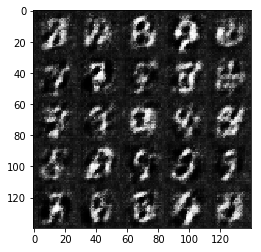

Epoch 1/2... Discriminator Loss: 2.0113... Generator Loss: 0.1834
Epoch 1/2... Discriminator Loss: 1.8948... Generator Loss: 0.2645
Epoch 1/2... Discriminator Loss: 1.5730... Generator Loss: 0.4283
Epoch 1/2... Discriminator Loss: 1.9999... Generator Loss: 0.2063
Epoch 1/2... Discriminator Loss: 2.4127... Generator Loss: 0.1344
Epoch 1/2... Discriminator Loss: 2.1176... Generator Loss: 0.1700
Epoch 1/2... Discriminator Loss: 1.8693... Generator Loss: 0.2413
Epoch 1/2... Discriminator Loss: 2.0031... Generator Loss: 0.2348
Epoch 1/2... Discriminator Loss: 2.0282... Generator Loss: 0.2482
Epoch 1/2... Discriminator Loss: 1.6954... Generator Loss: 0.2672


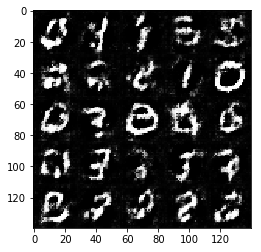

Epoch 1/2... Discriminator Loss: 2.5877... Generator Loss: 0.1180
Epoch 1/2... Discriminator Loss: 1.8745... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 2.7015... Generator Loss: 0.0962
Epoch 1/2... Discriminator Loss: 2.1586... Generator Loss: 0.2295
Epoch 1/2... Discriminator Loss: 2.7087... Generator Loss: 0.0849
Epoch 1/2... Discriminator Loss: 2.1447... Generator Loss: 0.1734
Epoch 1/2... Discriminator Loss: 1.9800... Generator Loss: 0.2463
Epoch 1/2... Discriminator Loss: 2.1904... Generator Loss: 0.1748
Epoch 1/2... Discriminator Loss: 2.5344... Generator Loss: 0.1128
Epoch 1/2... Discriminator Loss: 2.2561... Generator Loss: 0.1610


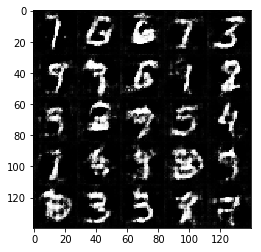

Epoch 1/2... Discriminator Loss: 2.4371... Generator Loss: 0.1206
Epoch 1/2... Discriminator Loss: 2.6368... Generator Loss: 0.0864
Epoch 1/2... Discriminator Loss: 2.0777... Generator Loss: 0.2733
Epoch 1/2... Discriminator Loss: 1.9146... Generator Loss: 0.2105
Epoch 1/2... Discriminator Loss: 1.6249... Generator Loss: 0.3807
Epoch 1/2... Discriminator Loss: 2.0850... Generator Loss: 0.3148
Epoch 1/2... Discriminator Loss: 2.5223... Generator Loss: 0.1148
Epoch 1/2... Discriminator Loss: 1.8384... Generator Loss: 0.3136
Epoch 1/2... Discriminator Loss: 2.1140... Generator Loss: 0.2303
Epoch 1/2... Discriminator Loss: 2.4243... Generator Loss: 0.2255


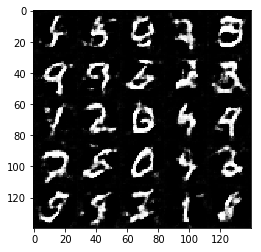

Epoch 1/2... Discriminator Loss: 2.3847... Generator Loss: 0.1431
Epoch 1/2... Discriminator Loss: 2.0231... Generator Loss: 0.1896
Epoch 1/2... Discriminator Loss: 1.9850... Generator Loss: 0.2411
Epoch 1/2... Discriminator Loss: 2.3180... Generator Loss: 0.1284
Epoch 1/2... Discriminator Loss: 1.5685... Generator Loss: 0.7800
Epoch 1/2... Discriminator Loss: 2.1118... Generator Loss: 0.2015
Epoch 1/2... Discriminator Loss: 2.2700... Generator Loss: 0.1728
Epoch 1/2... Discriminator Loss: 2.3500... Generator Loss: 0.1286
Epoch 1/2... Discriminator Loss: 2.2781... Generator Loss: 0.1985
Epoch 1/2... Discriminator Loss: 2.3895... Generator Loss: 0.1365


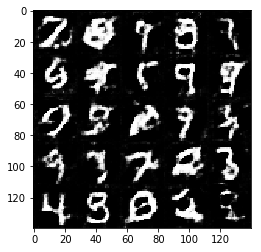

Epoch 1/2... Discriminator Loss: 2.6173... Generator Loss: 1.3282
Epoch 1/2... Discriminator Loss: 2.2296... Generator Loss: 0.1794
Epoch 1/2... Discriminator Loss: 1.9043... Generator Loss: 0.2239
Epoch 1/2... Discriminator Loss: 1.8609... Generator Loss: 0.2283
Epoch 1/2... Discriminator Loss: 2.0854... Generator Loss: 0.1984
Epoch 1/2... Discriminator Loss: 2.2723... Generator Loss: 0.1386
Epoch 1/2... Discriminator Loss: 3.2260... Generator Loss: 0.0684
Epoch 1/2... Discriminator Loss: 2.4451... Generator Loss: 0.1252
Epoch 1/2... Discriminator Loss: 2.1998... Generator Loss: 0.1617
Epoch 1/2... Discriminator Loss: 2.1978... Generator Loss: 0.1633


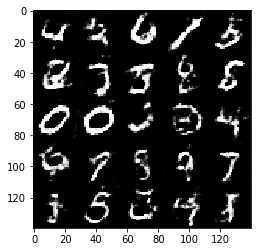

Epoch 1/2... Discriminator Loss: 2.1733... Generator Loss: 0.1530
Epoch 1/2... Discriminator Loss: 1.9351... Generator Loss: 0.2164
Epoch 1/2... Discriminator Loss: 2.6702... Generator Loss: 0.0926
Epoch 1/2... Discriminator Loss: 2.0056... Generator Loss: 0.2012
Epoch 1/2... Discriminator Loss: 2.6642... Generator Loss: 0.1129
Epoch 1/2... Discriminator Loss: 2.3234... Generator Loss: 0.1369
Epoch 1/2... Discriminator Loss: 2.1043... Generator Loss: 0.1794
Epoch 1/2... Discriminator Loss: 3.8838... Generator Loss: 0.0305
Epoch 1/2... Discriminator Loss: 2.1774... Generator Loss: 0.1540
Epoch 1/2... Discriminator Loss: 1.9719... Generator Loss: 0.2029


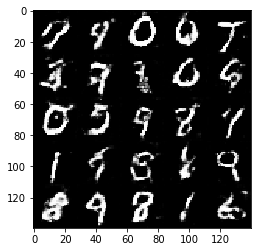

Epoch 1/2... Discriminator Loss: 2.1198... Generator Loss: 0.1708
Epoch 1/2... Discriminator Loss: 2.3374... Generator Loss: 0.1340
Epoch 1/2... Discriminator Loss: 2.0525... Generator Loss: 0.2026
Epoch 1/2... Discriminator Loss: 1.9527... Generator Loss: 0.2103
Epoch 1/2... Discriminator Loss: 2.2069... Generator Loss: 0.1442
Epoch 1/2... Discriminator Loss: 2.2367... Generator Loss: 0.1515
Epoch 1/2... Discriminator Loss: 2.9050... Generator Loss: 0.0705
Epoch 1/2... Discriminator Loss: 2.8793... Generator Loss: 0.0766
Epoch 1/2... Discriminator Loss: 2.6655... Generator Loss: 0.0950
Epoch 1/2... Discriminator Loss: 2.9143... Generator Loss: 0.0777


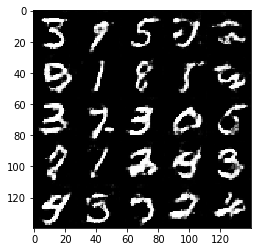

Epoch 1/2... Discriminator Loss: 3.0053... Generator Loss: 0.0835
Epoch 1/2... Discriminator Loss: 1.8734... Generator Loss: 0.3940
Epoch 1/2... Discriminator Loss: 2.2047... Generator Loss: 0.1682
Epoch 1/2... Discriminator Loss: 1.9322... Generator Loss: 0.2014
Epoch 1/2... Discriminator Loss: 1.9366... Generator Loss: 0.2129
Epoch 1/2... Discriminator Loss: 2.7811... Generator Loss: 0.0932
Epoch 1/2... Discriminator Loss: 1.5888... Generator Loss: 0.4973
Epoch 1/2... Discriminator Loss: 2.2291... Generator Loss: 0.1490
Epoch 1/2... Discriminator Loss: 2.2609... Generator Loss: 0.1645
Epoch 1/2... Discriminator Loss: 2.1973... Generator Loss: 0.1561


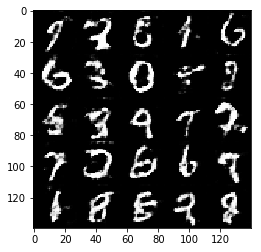

Epoch 1/2... Discriminator Loss: 2.6650... Generator Loss: 0.0951
Epoch 1/2... Discriminator Loss: 2.3498... Generator Loss: 0.1322
Epoch 1/2... Discriminator Loss: 2.0941... Generator Loss: 0.1653
Epoch 2/2... Discriminator Loss: 2.3147... Generator Loss: 0.1386
Epoch 2/2... Discriminator Loss: 2.6227... Generator Loss: 0.1010
Epoch 2/2... Discriminator Loss: 2.5405... Generator Loss: 0.1094
Epoch 2/2... Discriminator Loss: 2.7715... Generator Loss: 0.0848
Epoch 2/2... Discriminator Loss: 2.3795... Generator Loss: 0.1395
Epoch 2/2... Discriminator Loss: 2.7924... Generator Loss: 0.7682
Epoch 2/2... Discriminator Loss: 2.2768... Generator Loss: 0.1372
Epoch 2/2... Discriminator Loss: 2.4863... Generator Loss: 0.1139
Epoch 2/2... Discriminator Loss: 2.4280... Generator Loss: 0.1161
Epoch 2/2... Discriminator Loss: 2.5296... Generator Loss: 0.1132


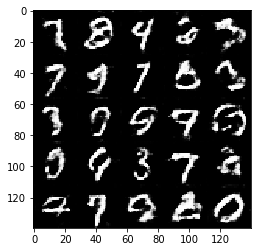

Epoch 2/2... Discriminator Loss: 2.4719... Generator Loss: 0.1169
Epoch 2/2... Discriminator Loss: 2.3069... Generator Loss: 0.1354
Epoch 2/2... Discriminator Loss: 2.7505... Generator Loss: 0.0994
Epoch 2/2... Discriminator Loss: 2.7596... Generator Loss: 0.0837
Epoch 2/2... Discriminator Loss: 2.5256... Generator Loss: 0.1004
Epoch 2/2... Discriminator Loss: 2.3376... Generator Loss: 0.1315
Epoch 2/2... Discriminator Loss: 2.8559... Generator Loss: 0.0955
Epoch 2/2... Discriminator Loss: 3.0432... Generator Loss: 0.0663
Epoch 2/2... Discriminator Loss: 2.4547... Generator Loss: 0.1230
Epoch 2/2... Discriminator Loss: 5.0283... Generator Loss: 0.0243


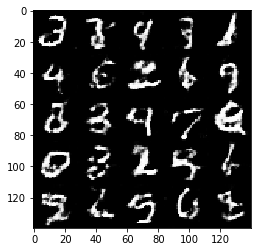

Epoch 2/2... Discriminator Loss: 2.0241... Generator Loss: 0.1979
Epoch 2/2... Discriminator Loss: 2.5623... Generator Loss: 0.1037
Epoch 2/2... Discriminator Loss: 3.0281... Generator Loss: 0.0726
Epoch 2/2... Discriminator Loss: 2.6667... Generator Loss: 0.1018
Epoch 2/2... Discriminator Loss: 2.2705... Generator Loss: 0.1392
Epoch 2/2... Discriminator Loss: 2.5037... Generator Loss: 0.1084
Epoch 2/2... Discriminator Loss: 2.6156... Generator Loss: 0.1102
Epoch 2/2... Discriminator Loss: 2.4751... Generator Loss: 0.1172
Epoch 2/2... Discriminator Loss: 2.8834... Generator Loss: 0.0742
Epoch 2/2... Discriminator Loss: 2.5571... Generator Loss: 0.1033


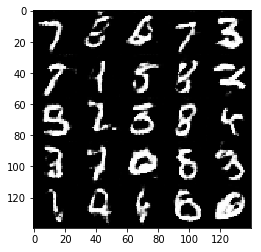

Epoch 2/2... Discriminator Loss: 2.4262... Generator Loss: 0.1254
Epoch 2/2... Discriminator Loss: 2.5727... Generator Loss: 0.1066
Epoch 2/2... Discriminator Loss: 3.0276... Generator Loss: 0.0715
Epoch 2/2... Discriminator Loss: 2.3276... Generator Loss: 0.1410
Epoch 2/2... Discriminator Loss: 2.5622... Generator Loss: 0.1190
Epoch 2/2... Discriminator Loss: 2.6733... Generator Loss: 0.1045
Epoch 2/2... Discriminator Loss: 3.0523... Generator Loss: 0.0675
Epoch 2/2... Discriminator Loss: 2.8406... Generator Loss: 0.0826
Epoch 2/2... Discriminator Loss: 2.9037... Generator Loss: 0.0797
Epoch 2/2... Discriminator Loss: 2.2487... Generator Loss: 0.1403


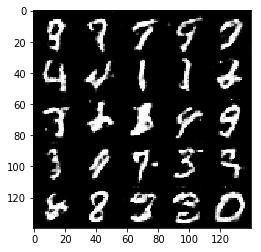

Epoch 2/2... Discriminator Loss: 3.2677... Generator Loss: 0.0616
Epoch 2/2... Discriminator Loss: 2.6159... Generator Loss: 0.1093
Epoch 2/2... Discriminator Loss: 2.5800... Generator Loss: 0.2467
Epoch 2/2... Discriminator Loss: 1.7438... Generator Loss: 0.2399
Epoch 2/2... Discriminator Loss: 2.5298... Generator Loss: 0.1185
Epoch 2/2... Discriminator Loss: 2.0874... Generator Loss: 0.2120
Epoch 2/2... Discriminator Loss: 2.4724... Generator Loss: 0.1245
Epoch 2/2... Discriminator Loss: 2.9595... Generator Loss: 0.0734
Epoch 2/2... Discriminator Loss: 2.8300... Generator Loss: 0.0753
Epoch 2/2... Discriminator Loss: 2.4934... Generator Loss: 0.1186


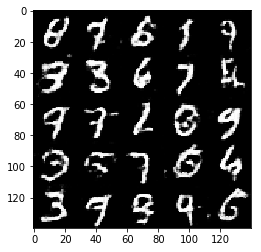

Epoch 2/2... Discriminator Loss: 2.5228... Generator Loss: 0.2038
Epoch 2/2... Discriminator Loss: 2.5247... Generator Loss: 0.1054
Epoch 2/2... Discriminator Loss: 2.6750... Generator Loss: 0.0959
Epoch 2/2... Discriminator Loss: 2.9587... Generator Loss: 0.0809
Epoch 2/2... Discriminator Loss: 2.3543... Generator Loss: 0.1363
Epoch 2/2... Discriminator Loss: 2.2786... Generator Loss: 0.1580
Epoch 2/2... Discriminator Loss: 1.5032... Generator Loss: 0.4935
Epoch 2/2... Discriminator Loss: 2.1493... Generator Loss: 0.1705
Epoch 2/2... Discriminator Loss: 2.2626... Generator Loss: 0.1317
Epoch 2/2... Discriminator Loss: 2.7454... Generator Loss: 0.0866


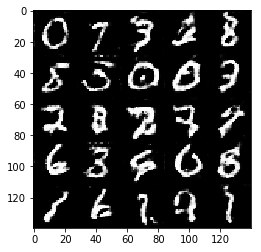

Epoch 2/2... Discriminator Loss: 2.0603... Generator Loss: 0.2187
Epoch 2/2... Discriminator Loss: 2.2421... Generator Loss: 0.1366
Epoch 2/2... Discriminator Loss: 2.7257... Generator Loss: 0.1160
Epoch 2/2... Discriminator Loss: 2.3981... Generator Loss: 0.1322
Epoch 2/2... Discriminator Loss: 2.7209... Generator Loss: 0.1027
Epoch 2/2... Discriminator Loss: 2.8783... Generator Loss: 0.0771
Epoch 2/2... Discriminator Loss: 2.4916... Generator Loss: 0.1194
Epoch 2/2... Discriminator Loss: 3.7556... Generator Loss: 0.0433
Epoch 2/2... Discriminator Loss: 1.2764... Generator Loss: 0.5784
Epoch 2/2... Discriminator Loss: 2.1350... Generator Loss: 0.1901


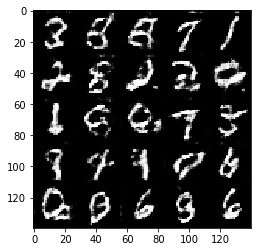

Epoch 2/2... Discriminator Loss: 2.3046... Generator Loss: 0.6414
Epoch 2/2... Discriminator Loss: 2.3533... Generator Loss: 0.1599
Epoch 2/2... Discriminator Loss: 2.9924... Generator Loss: 0.0631
Epoch 2/2... Discriminator Loss: 2.3525... Generator Loss: 0.1207
Epoch 2/2... Discriminator Loss: 2.3471... Generator Loss: 0.1375
Epoch 2/2... Discriminator Loss: 2.7196... Generator Loss: 0.0947
Epoch 2/2... Discriminator Loss: 2.3670... Generator Loss: 0.1300
Epoch 2/2... Discriminator Loss: 3.1996... Generator Loss: 0.0528
Epoch 2/2... Discriminator Loss: 2.5425... Generator Loss: 0.1059
Epoch 2/2... Discriminator Loss: 2.7337... Generator Loss: 0.0903


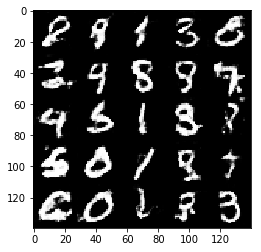

Epoch 2/2... Discriminator Loss: 3.3203... Generator Loss: 0.0993
Epoch 2/2... Discriminator Loss: 2.4990... Generator Loss: 0.1082
Epoch 2/2... Discriminator Loss: 3.2280... Generator Loss: 0.0520
Epoch 2/2... Discriminator Loss: 2.8412... Generator Loss: 0.0997
Epoch 2/2... Discriminator Loss: 3.0192... Generator Loss: 0.0650
Epoch 2/2... Discriminator Loss: 4.3099... Generator Loss: 0.0350
Epoch 2/2... Discriminator Loss: 1.1731... Generator Loss: 0.8187
Epoch 2/2... Discriminator Loss: 2.3485... Generator Loss: 0.1517
Epoch 2/2... Discriminator Loss: 2.5565... Generator Loss: 0.1005
Epoch 2/2... Discriminator Loss: 1.8852... Generator Loss: 0.2186


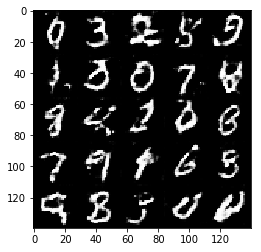

Epoch 2/2... Discriminator Loss: 1.9452... Generator Loss: 0.2123
Epoch 2/2... Discriminator Loss: 1.9287... Generator Loss: 0.2062
Epoch 2/2... Discriminator Loss: 2.7782... Generator Loss: 0.0919


In [12]:
batch_size = 64
z_dim = 200
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 6.1678... Generator Loss: 0.0034
Epoch 1/1... Discriminator Loss: 3.7663... Generator Loss: 0.0315
Epoch 1/1... Discriminator Loss: 3.2585... Generator Loss: 0.0765
Epoch 1/1... Discriminator Loss: 2.4869... Generator Loss: 0.2097
Epoch 1/1... Discriminator Loss: 2.4302... Generator Loss: 0.1646
Epoch 1/1... Discriminator Loss: 2.5078... Generator Loss: 0.3389
Epoch 1/1... Discriminator Loss: 2.7219... Generator Loss: 0.1419
Epoch 1/1... Discriminator Loss: 2.5827... Generator Loss: 0.1750
Epoch 1/1... Discriminator Loss: 2.7012... Generator Loss: 0.1238
Epoch 1/1... Discriminator Loss: 2.7100... Generator Loss: 0.1194


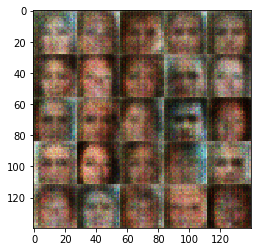

Epoch 1/1... Discriminator Loss: 2.5527... Generator Loss: 0.1509
Epoch 1/1... Discriminator Loss: 2.8262... Generator Loss: 0.1064
Epoch 1/1... Discriminator Loss: 2.6048... Generator Loss: 0.2057
Epoch 1/1... Discriminator Loss: 2.4406... Generator Loss: 0.1692
Epoch 1/1... Discriminator Loss: 3.1095... Generator Loss: 0.0766
Epoch 1/1... Discriminator Loss: 2.7032... Generator Loss: 0.1266
Epoch 1/1... Discriminator Loss: 2.3467... Generator Loss: 0.2512
Epoch 1/1... Discriminator Loss: 2.1350... Generator Loss: 0.2432
Epoch 1/1... Discriminator Loss: 2.1335... Generator Loss: 0.3076
Epoch 1/1... Discriminator Loss: 2.0278... Generator Loss: 0.2748


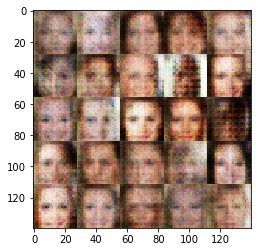

Epoch 1/1... Discriminator Loss: 1.8398... Generator Loss: 0.4496
Epoch 1/1... Discriminator Loss: 1.7623... Generator Loss: 0.4372
Epoch 1/1... Discriminator Loss: 1.6976... Generator Loss: 0.4348
Epoch 1/1... Discriminator Loss: 1.8658... Generator Loss: 0.3528
Epoch 1/1... Discriminator Loss: 1.7468... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.8906... Generator Loss: 0.3639
Epoch 1/1... Discriminator Loss: 1.4937... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.7093... Generator Loss: 0.5117
Epoch 1/1... Discriminator Loss: 1.6519... Generator Loss: 0.4596
Epoch 1/1... Discriminator Loss: 1.7038... Generator Loss: 0.4279


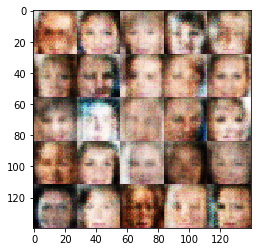

Epoch 1/1... Discriminator Loss: 1.6915... Generator Loss: 0.4622
Epoch 1/1... Discriminator Loss: 1.5719... Generator Loss: 0.5171
Epoch 1/1... Discriminator Loss: 1.7362... Generator Loss: 0.4219
Epoch 1/1... Discriminator Loss: 1.7726... Generator Loss: 0.3939
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.5145
Epoch 1/1... Discriminator Loss: 1.7308... Generator Loss: 0.4143
Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.4496
Epoch 1/1... Discriminator Loss: 1.6467... Generator Loss: 0.4693
Epoch 1/1... Discriminator Loss: 1.6848... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 1.6811... Generator Loss: 0.4097


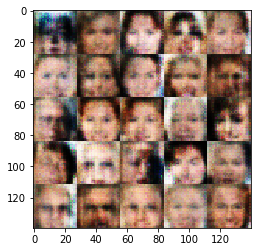

Epoch 1/1... Discriminator Loss: 1.7215... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.5527... Generator Loss: 0.4877
Epoch 1/1... Discriminator Loss: 1.7836... Generator Loss: 0.3775
Epoch 1/1... Discriminator Loss: 1.8048... Generator Loss: 0.3467
Epoch 1/1... Discriminator Loss: 1.5762... Generator Loss: 0.4852
Epoch 1/1... Discriminator Loss: 1.6504... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 1.7215... Generator Loss: 0.3878
Epoch 1/1... Discriminator Loss: 1.7155... Generator Loss: 0.3979
Epoch 1/1... Discriminator Loss: 1.7663... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.9155... Generator Loss: 0.3268


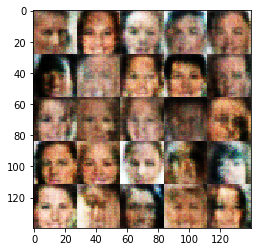

Epoch 1/1... Discriminator Loss: 1.9554... Generator Loss: 0.3675
Epoch 1/1... Discriminator Loss: 1.8399... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 1.7148... Generator Loss: 0.4176
Epoch 1/1... Discriminator Loss: 1.8298... Generator Loss: 0.3551
Epoch 1/1... Discriminator Loss: 1.7384... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.7808... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 1.6458... Generator Loss: 0.4665
Epoch 1/1... Discriminator Loss: 1.8487... Generator Loss: 0.3817
Epoch 1/1... Discriminator Loss: 1.8207... Generator Loss: 0.3852
Epoch 1/1... Discriminator Loss: 1.7802... Generator Loss: 0.3733


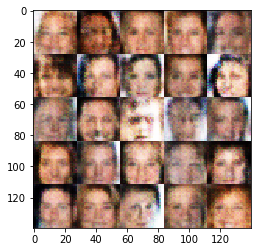

Epoch 1/1... Discriminator Loss: 1.9356... Generator Loss: 0.3304
Epoch 1/1... Discriminator Loss: 1.8676... Generator Loss: 0.3791
Epoch 1/1... Discriminator Loss: 1.7021... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.7297... Generator Loss: 0.4403
Epoch 1/1... Discriminator Loss: 1.6313... Generator Loss: 0.4636
Epoch 1/1... Discriminator Loss: 1.8163... Generator Loss: 0.3734
Epoch 1/1... Discriminator Loss: 1.6992... Generator Loss: 0.4336
Epoch 1/1... Discriminator Loss: 1.7272... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 1.6788... Generator Loss: 0.4014
Epoch 1/1... Discriminator Loss: 1.8223... Generator Loss: 0.3634


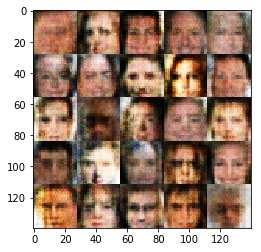

Epoch 1/1... Discriminator Loss: 1.6684... Generator Loss: 0.5027
Epoch 1/1... Discriminator Loss: 1.7215... Generator Loss: 0.3984
Epoch 1/1... Discriminator Loss: 1.6891... Generator Loss: 0.3912
Epoch 1/1... Discriminator Loss: 1.7764... Generator Loss: 0.3927
Epoch 1/1... Discriminator Loss: 1.6669... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.7636... Generator Loss: 0.3814
Epoch 1/1... Discriminator Loss: 1.7520... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.7148... Generator Loss: 0.4240
Epoch 1/1... Discriminator Loss: 1.9449... Generator Loss: 0.3035
Epoch 1/1... Discriminator Loss: 1.9279... Generator Loss: 0.2945


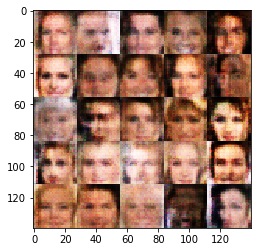

Epoch 1/1... Discriminator Loss: 1.7644... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 1.7640... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.7121... Generator Loss: 0.3836
Epoch 1/1... Discriminator Loss: 1.7266... Generator Loss: 0.3747
Epoch 1/1... Discriminator Loss: 1.8006... Generator Loss: 0.3745
Epoch 1/1... Discriminator Loss: 1.9409... Generator Loss: 0.3147
Epoch 1/1... Discriminator Loss: 1.8996... Generator Loss: 0.3539
Epoch 1/1... Discriminator Loss: 1.9054... Generator Loss: 0.3317
Epoch 1/1... Discriminator Loss: 1.9058... Generator Loss: 0.3284
Epoch 1/1... Discriminator Loss: 1.8816... Generator Loss: 0.3583


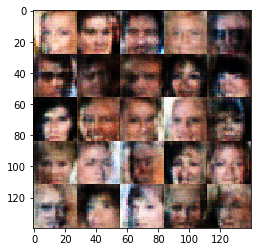

Epoch 1/1... Discriminator Loss: 1.8329... Generator Loss: 0.3302
Epoch 1/1... Discriminator Loss: 1.6876... Generator Loss: 0.4239
Epoch 1/1... Discriminator Loss: 1.8612... Generator Loss: 0.3392
Epoch 1/1... Discriminator Loss: 1.7496... Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 1.8967... Generator Loss: 0.3109
Epoch 1/1... Discriminator Loss: 1.8426... Generator Loss: 0.3458
Epoch 1/1... Discriminator Loss: 1.9127... Generator Loss: 0.3336
Epoch 1/1... Discriminator Loss: 1.8039... Generator Loss: 0.3829
Epoch 1/1... Discriminator Loss: 1.9879... Generator Loss: 0.2700
Epoch 1/1... Discriminator Loss: 2.0178... Generator Loss: 0.2983


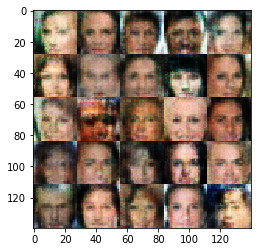

Epoch 1/1... Discriminator Loss: 1.8384... Generator Loss: 0.3894
Epoch 1/1... Discriminator Loss: 1.9427... Generator Loss: 0.2823
Epoch 1/1... Discriminator Loss: 1.9659... Generator Loss: 0.2621
Epoch 1/1... Discriminator Loss: 1.7909... Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 2.0469... Generator Loss: 0.2674
Epoch 1/1... Discriminator Loss: 1.9972... Generator Loss: 0.2893
Epoch 1/1... Discriminator Loss: 1.8156... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 2.0271... Generator Loss: 0.2816
Epoch 1/1... Discriminator Loss: 1.8507... Generator Loss: 0.3820
Epoch 1/1... Discriminator Loss: 2.1947... Generator Loss: 0.2234


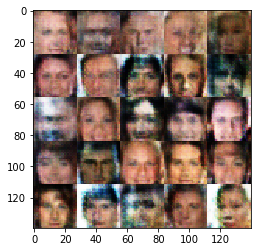

Epoch 1/1... Discriminator Loss: 1.9431... Generator Loss: 0.2792
Epoch 1/1... Discriminator Loss: 1.8173... Generator Loss: 0.3528
Epoch 1/1... Discriminator Loss: 1.9329... Generator Loss: 0.2648
Epoch 1/1... Discriminator Loss: 2.0729... Generator Loss: 0.2494
Epoch 1/1... Discriminator Loss: 1.9260... Generator Loss: 0.2798
Epoch 1/1... Discriminator Loss: 2.2005... Generator Loss: 0.2246
Epoch 1/1... Discriminator Loss: 2.0959... Generator Loss: 0.2587
Epoch 1/1... Discriminator Loss: 2.1881... Generator Loss: 0.2145
Epoch 1/1... Discriminator Loss: 1.7489... Generator Loss: 0.4284
Epoch 1/1... Discriminator Loss: 1.8419... Generator Loss: 0.3966


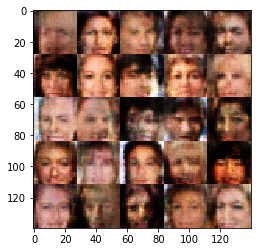

Epoch 1/1... Discriminator Loss: 2.0936... Generator Loss: 0.2521
Epoch 1/1... Discriminator Loss: 2.0326... Generator Loss: 0.2632
Epoch 1/1... Discriminator Loss: 1.9264... Generator Loss: 0.3486
Epoch 1/1... Discriminator Loss: 2.0395... Generator Loss: 0.2497
Epoch 1/1... Discriminator Loss: 2.0777... Generator Loss: 0.2447
Epoch 1/1... Discriminator Loss: 1.9587... Generator Loss: 0.2579
Epoch 1/1... Discriminator Loss: 2.0946... Generator Loss: 0.2438
Epoch 1/1... Discriminator Loss: 1.9689... Generator Loss: 0.2626
Epoch 1/1... Discriminator Loss: 2.0514... Generator Loss: 0.2750
Epoch 1/1... Discriminator Loss: 2.0686... Generator Loss: 0.2675


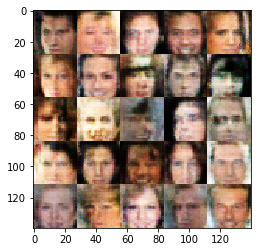

Epoch 1/1... Discriminator Loss: 2.0117... Generator Loss: 0.2538
Epoch 1/1... Discriminator Loss: 2.2546... Generator Loss: 0.2004
Epoch 1/1... Discriminator Loss: 2.1027... Generator Loss: 0.2291
Epoch 1/1... Discriminator Loss: 2.1829... Generator Loss: 0.1890
Epoch 1/1... Discriminator Loss: 2.1145... Generator Loss: 0.2065
Epoch 1/1... Discriminator Loss: 2.0600... Generator Loss: 0.2962
Epoch 1/1... Discriminator Loss: 2.1255... Generator Loss: 0.2290
Epoch 1/1... Discriminator Loss: 2.5094... Generator Loss: 0.1648
Epoch 1/1... Discriminator Loss: 2.0092... Generator Loss: 0.3249
Epoch 1/1... Discriminator Loss: 2.0213... Generator Loss: 0.2454


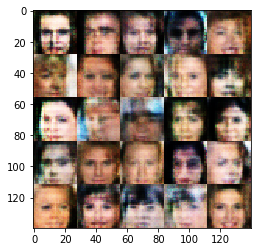

Epoch 1/1... Discriminator Loss: 1.9381... Generator Loss: 0.3066
Epoch 1/1... Discriminator Loss: 2.2624... Generator Loss: 0.1694
Epoch 1/1... Discriminator Loss: 2.0590... Generator Loss: 0.2783
Epoch 1/1... Discriminator Loss: 2.2026... Generator Loss: 0.2438
Epoch 1/1... Discriminator Loss: 1.9982... Generator Loss: 0.2621
Epoch 1/1... Discriminator Loss: 2.3022... Generator Loss: 0.2229
Epoch 1/1... Discriminator Loss: 2.2692... Generator Loss: 0.2573
Epoch 1/1... Discriminator Loss: 2.2329... Generator Loss: 0.1896
Epoch 1/1... Discriminator Loss: 2.0400... Generator Loss: 0.2248
Epoch 1/1... Discriminator Loss: 1.9979... Generator Loss: 0.2593


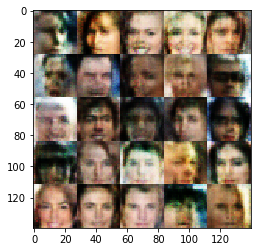

Epoch 1/1... Discriminator Loss: 1.9175... Generator Loss: 0.3406
Epoch 1/1... Discriminator Loss: 2.1164... Generator Loss: 0.2043
Epoch 1/1... Discriminator Loss: 2.1359... Generator Loss: 0.2020
Epoch 1/1... Discriminator Loss: 2.2279... Generator Loss: 0.2056
Epoch 1/1... Discriminator Loss: 2.1763... Generator Loss: 0.1942
Epoch 1/1... Discriminator Loss: 2.2245... Generator Loss: 0.2070
Epoch 1/1... Discriminator Loss: 2.1648... Generator Loss: 0.2422
Epoch 1/1... Discriminator Loss: 2.1988... Generator Loss: 0.2285
Epoch 1/1... Discriminator Loss: 2.0933... Generator Loss: 0.2494
Epoch 1/1... Discriminator Loss: 1.9059... Generator Loss: 0.2608


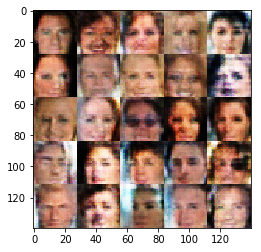

Epoch 1/1... Discriminator Loss: 2.5204... Generator Loss: 0.1387
Epoch 1/1... Discriminator Loss: 2.1209... Generator Loss: 0.2378
Epoch 1/1... Discriminator Loss: 2.1523... Generator Loss: 0.2221
Epoch 1/1... Discriminator Loss: 2.3258... Generator Loss: 0.1886
Epoch 1/1... Discriminator Loss: 2.0921... Generator Loss: 0.2436
Epoch 1/1... Discriminator Loss: 2.3743... Generator Loss: 0.1640
Epoch 1/1... Discriminator Loss: 2.2649... Generator Loss: 0.1931
Epoch 1/1... Discriminator Loss: 2.0534... Generator Loss: 0.2589
Epoch 1/1... Discriminator Loss: 2.2835... Generator Loss: 0.2403
Epoch 1/1... Discriminator Loss: 2.2495... Generator Loss: 0.2351


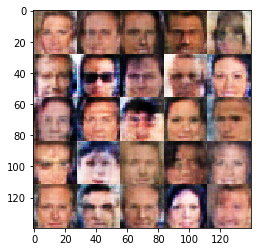

Epoch 1/1... Discriminator Loss: 2.0014... Generator Loss: 0.2688
Epoch 1/1... Discriminator Loss: 2.1721... Generator Loss: 0.2732
Epoch 1/1... Discriminator Loss: 2.0699... Generator Loss: 0.2548
Epoch 1/1... Discriminator Loss: 2.2319... Generator Loss: 0.2238
Epoch 1/1... Discriminator Loss: 2.0325... Generator Loss: 0.2619
Epoch 1/1... Discriminator Loss: 2.1397... Generator Loss: 0.2592
Epoch 1/1... Discriminator Loss: 2.2196... Generator Loss: 0.3006
Epoch 1/1... Discriminator Loss: 2.2581... Generator Loss: 0.1997
Epoch 1/1... Discriminator Loss: 2.2161... Generator Loss: 0.2032
Epoch 1/1... Discriminator Loss: 2.3506... Generator Loss: 0.1413


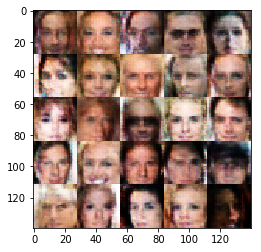

Epoch 1/1... Discriminator Loss: 2.0473... Generator Loss: 0.2481
Epoch 1/1... Discriminator Loss: 2.2597... Generator Loss: 0.2046
Epoch 1/1... Discriminator Loss: 2.4222... Generator Loss: 0.1378
Epoch 1/1... Discriminator Loss: 2.3222... Generator Loss: 0.1831
Epoch 1/1... Discriminator Loss: 2.1748... Generator Loss: 0.2274
Epoch 1/1... Discriminator Loss: 2.2705... Generator Loss: 0.2287
Epoch 1/1... Discriminator Loss: 2.2875... Generator Loss: 0.1467
Epoch 1/1... Discriminator Loss: 2.7645... Generator Loss: 0.2861
Epoch 1/1... Discriminator Loss: 2.2078... Generator Loss: 0.2147
Epoch 1/1... Discriminator Loss: 2.2879... Generator Loss: 0.1753


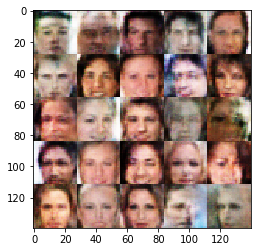

Epoch 1/1... Discriminator Loss: 2.3964... Generator Loss: 0.1977
Epoch 1/1... Discriminator Loss: 2.6325... Generator Loss: 0.1221
Epoch 1/1... Discriminator Loss: 2.1401... Generator Loss: 0.2271
Epoch 1/1... Discriminator Loss: 2.3765... Generator Loss: 0.1618
Epoch 1/1... Discriminator Loss: 1.9794... Generator Loss: 0.2484
Epoch 1/1... Discriminator Loss: 2.0976... Generator Loss: 0.2599
Epoch 1/1... Discriminator Loss: 2.4696... Generator Loss: 0.1288
Epoch 1/1... Discriminator Loss: 2.5241... Generator Loss: 0.1326
Epoch 1/1... Discriminator Loss: 2.6222... Generator Loss: 0.1074
Epoch 1/1... Discriminator Loss: 2.2946... Generator Loss: 0.2260


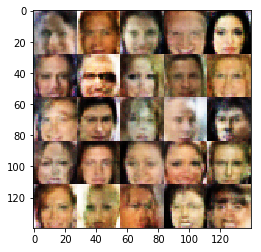

Epoch 1/1... Discriminator Loss: 2.5563... Generator Loss: 0.1179
Epoch 1/1... Discriminator Loss: 2.2857... Generator Loss: 0.1620
Epoch 1/1... Discriminator Loss: 2.2814... Generator Loss: 0.1693
Epoch 1/1... Discriminator Loss: 2.3692... Generator Loss: 0.1668
Epoch 1/1... Discriminator Loss: 2.2275... Generator Loss: 0.1816
Epoch 1/1... Discriminator Loss: 2.6567... Generator Loss: 0.0976
Epoch 1/1... Discriminator Loss: 2.5040... Generator Loss: 0.1396
Epoch 1/1... Discriminator Loss: 2.4246... Generator Loss: 0.1848
Epoch 1/1... Discriminator Loss: 2.6913... Generator Loss: 0.2633
Epoch 1/1... Discriminator Loss: 2.2363... Generator Loss: 0.2056


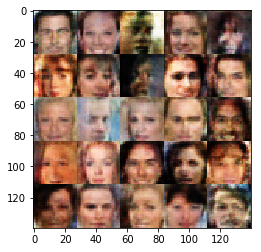

Epoch 1/1... Discriminator Loss: 2.4071... Generator Loss: 0.1542
Epoch 1/1... Discriminator Loss: 2.3992... Generator Loss: 0.1500
Epoch 1/1... Discriminator Loss: 2.6886... Generator Loss: 0.0915
Epoch 1/1... Discriminator Loss: 2.4558... Generator Loss: 0.1631
Epoch 1/1... Discriminator Loss: 2.3991... Generator Loss: 0.1667
Epoch 1/1... Discriminator Loss: 2.2368... Generator Loss: 0.1714
Epoch 1/1... Discriminator Loss: 2.4823... Generator Loss: 0.1324
Epoch 1/1... Discriminator Loss: 2.3174... Generator Loss: 0.1541
Epoch 1/1... Discriminator Loss: 2.4334... Generator Loss: 0.1195
Epoch 1/1... Discriminator Loss: 2.4742... Generator Loss: 0.1455


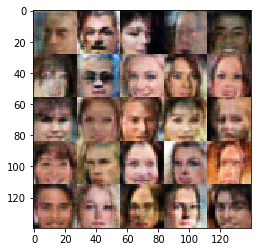

Epoch 1/1... Discriminator Loss: 2.4333... Generator Loss: 0.1529
Epoch 1/1... Discriminator Loss: 2.3307... Generator Loss: 0.1799
Epoch 1/1... Discriminator Loss: 2.2242... Generator Loss: 0.2104
Epoch 1/1... Discriminator Loss: 2.5752... Generator Loss: 0.1131
Epoch 1/1... Discriminator Loss: 2.4543... Generator Loss: 0.1541
Epoch 1/1... Discriminator Loss: 2.4439... Generator Loss: 0.1472
Epoch 1/1... Discriminator Loss: 2.6191... Generator Loss: 0.1052
Epoch 1/1... Discriminator Loss: 2.4154... Generator Loss: 0.1518
Epoch 1/1... Discriminator Loss: 2.4219... Generator Loss: 0.1501
Epoch 1/1... Discriminator Loss: 2.2370... Generator Loss: 0.1816


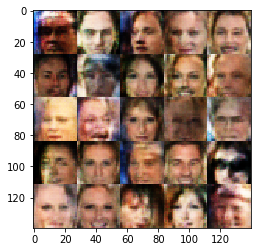

Epoch 1/1... Discriminator Loss: 2.6880... Generator Loss: 0.1044
Epoch 1/1... Discriminator Loss: 2.6276... Generator Loss: 0.1118
Epoch 1/1... Discriminator Loss: 2.4380... Generator Loss: 0.1361
Epoch 1/1... Discriminator Loss: 2.7392... Generator Loss: 0.1075
Epoch 1/1... Discriminator Loss: 2.5031... Generator Loss: 0.1389
Epoch 1/1... Discriminator Loss: 2.4504... Generator Loss: 0.1400
Epoch 1/1... Discriminator Loss: 2.6109... Generator Loss: 0.1259
Epoch 1/1... Discriminator Loss: 2.4658... Generator Loss: 0.1240
Epoch 1/1... Discriminator Loss: 2.4221... Generator Loss: 0.1288
Epoch 1/1... Discriminator Loss: 2.8627... Generator Loss: 0.0773


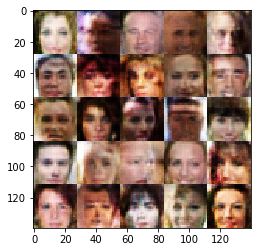

Epoch 1/1... Discriminator Loss: 2.6381... Generator Loss: 0.1027
Epoch 1/1... Discriminator Loss: 2.4869... Generator Loss: 0.1433
Epoch 1/1... Discriminator Loss: 2.4268... Generator Loss: 0.1976
Epoch 1/1... Discriminator Loss: 2.8709... Generator Loss: 0.0759
Epoch 1/1... Discriminator Loss: 2.2802... Generator Loss: 0.1802
Epoch 1/1... Discriminator Loss: 2.4205... Generator Loss: 0.1431
Epoch 1/1... Discriminator Loss: 2.6298... Generator Loss: 0.0995
Epoch 1/1... Discriminator Loss: 2.4265... Generator Loss: 0.1311
Epoch 1/1... Discriminator Loss: 2.3639... Generator Loss: 0.1563
Epoch 1/1... Discriminator Loss: 2.5759... Generator Loss: 0.1119


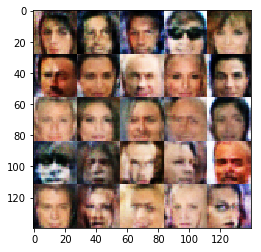

Epoch 1/1... Discriminator Loss: 2.4748... Generator Loss: 0.1237
Epoch 1/1... Discriminator Loss: 2.3969... Generator Loss: 0.1303
Epoch 1/1... Discriminator Loss: 2.4401... Generator Loss: 0.1201
Epoch 1/1... Discriminator Loss: 2.6165... Generator Loss: 0.1019
Epoch 1/1... Discriminator Loss: 2.6047... Generator Loss: 0.1534
Epoch 1/1... Discriminator Loss: 2.8539... Generator Loss: 0.0812
Epoch 1/1... Discriminator Loss: 2.5120... Generator Loss: 0.2138
Epoch 1/1... Discriminator Loss: 2.7232... Generator Loss: 0.1025
Epoch 1/1... Discriminator Loss: 2.7588... Generator Loss: 0.1189
Epoch 1/1... Discriminator Loss: 2.3873... Generator Loss: 0.1273


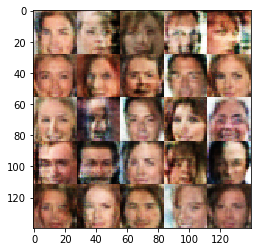

Epoch 1/1... Discriminator Loss: 2.3857... Generator Loss: 0.1374
Epoch 1/1... Discriminator Loss: 2.9557... Generator Loss: 0.0779
Epoch 1/1... Discriminator Loss: 2.5295... Generator Loss: 0.1864
Epoch 1/1... Discriminator Loss: 2.8920... Generator Loss: 0.1023
Epoch 1/1... Discriminator Loss: 2.5147... Generator Loss: 0.1254
Epoch 1/1... Discriminator Loss: 2.2464... Generator Loss: 0.1703
Epoch 1/1... Discriminator Loss: 3.1659... Generator Loss: 0.0711
Epoch 1/1... Discriminator Loss: 2.6256... Generator Loss: 0.1111
Epoch 1/1... Discriminator Loss: 2.6898... Generator Loss: 0.1059
Epoch 1/1... Discriminator Loss: 2.7324... Generator Loss: 0.0876


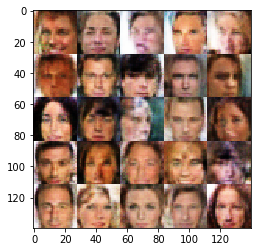

Epoch 1/1... Discriminator Loss: 2.7806... Generator Loss: 0.0945
Epoch 1/1... Discriminator Loss: 2.7811... Generator Loss: 0.0834
Epoch 1/1... Discriminator Loss: 3.0023... Generator Loss: 0.0642
Epoch 1/1... Discriminator Loss: 2.6423... Generator Loss: 0.0985
Epoch 1/1... Discriminator Loss: 2.7874... Generator Loss: 0.0880
Epoch 1/1... Discriminator Loss: 2.4894... Generator Loss: 0.2145
Epoch 1/1... Discriminator Loss: 2.5521... Generator Loss: 0.1392
Epoch 1/1... Discriminator Loss: 2.7756... Generator Loss: 0.0816
Epoch 1/1... Discriminator Loss: 2.6328... Generator Loss: 0.0963
Epoch 1/1... Discriminator Loss: 2.9415... Generator Loss: 0.1058


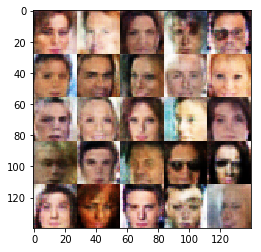

Epoch 1/1... Discriminator Loss: 2.7114... Generator Loss: 0.1453
Epoch 1/1... Discriminator Loss: 2.8557... Generator Loss: 0.0823
Epoch 1/1... Discriminator Loss: 2.6837... Generator Loss: 0.0889
Epoch 1/1... Discriminator Loss: 2.6674... Generator Loss: 0.1165
Epoch 1/1... Discriminator Loss: 2.7957... Generator Loss: 0.0932
Epoch 1/1... Discriminator Loss: 2.4745... Generator Loss: 0.1437
Epoch 1/1... Discriminator Loss: 2.7685... Generator Loss: 0.0951
Epoch 1/1... Discriminator Loss: 2.6511... Generator Loss: 0.1023
Epoch 1/1... Discriminator Loss: 2.5395... Generator Loss: 0.1256
Epoch 1/1... Discriminator Loss: 2.7498... Generator Loss: 0.0999


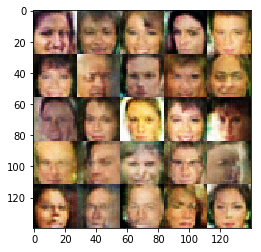

Epoch 1/1... Discriminator Loss: 2.8614... Generator Loss: 0.1482
Epoch 1/1... Discriminator Loss: 2.6932... Generator Loss: 0.2578
Epoch 1/1... Discriminator Loss: 2.7098... Generator Loss: 0.0893
Epoch 1/1... Discriminator Loss: 2.5614... Generator Loss: 0.2213
Epoch 1/1... Discriminator Loss: 2.8136... Generator Loss: 0.0843
Epoch 1/1... Discriminator Loss: 2.3720... Generator Loss: 0.1395
Epoch 1/1... Discriminator Loss: 2.6736... Generator Loss: 0.1132
Epoch 1/1... Discriminator Loss: 2.8211... Generator Loss: 0.0789
Epoch 1/1... Discriminator Loss: 2.8188... Generator Loss: 0.0825
Epoch 1/1... Discriminator Loss: 2.4390... Generator Loss: 0.1279


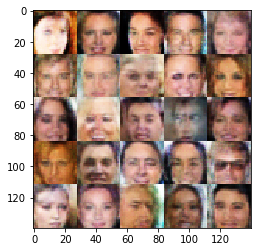

Epoch 1/1... Discriminator Loss: 2.5308... Generator Loss: 0.1199
Epoch 1/1... Discriminator Loss: 2.9628... Generator Loss: 0.0733
Epoch 1/1... Discriminator Loss: 2.2725... Generator Loss: 0.2275
Epoch 1/1... Discriminator Loss: 2.9881... Generator Loss: 0.0809
Epoch 1/1... Discriminator Loss: 2.7400... Generator Loss: 0.1438
Epoch 1/1... Discriminator Loss: 2.6138... Generator Loss: 0.1077
Epoch 1/1... Discriminator Loss: 2.4636... Generator Loss: 0.1279
Epoch 1/1... Discriminator Loss: 2.8192... Generator Loss: 0.0935
Epoch 1/1... Discriminator Loss: 3.2706... Generator Loss: 0.0536
Epoch 1/1... Discriminator Loss: 3.0820... Generator Loss: 0.0601


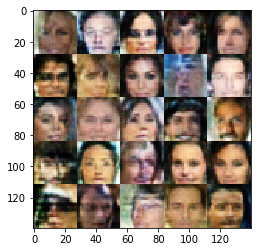

Epoch 1/1... Discriminator Loss: 2.9764... Generator Loss: 0.0669
Epoch 1/1... Discriminator Loss: 2.6848... Generator Loss: 0.1229
Epoch 1/1... Discriminator Loss: 2.5361... Generator Loss: 0.1297
Epoch 1/1... Discriminator Loss: 2.6039... Generator Loss: 0.1423
Epoch 1/1... Discriminator Loss: 3.1870... Generator Loss: 0.0849
Epoch 1/1... Discriminator Loss: 3.0638... Generator Loss: 0.0625


In [13]:
batch_size = 64
z_dim = 200
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.